# Unsupervised learning

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import umap

from collections import Counter
from sklearn import datasets, metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from MulticoreTSNE import MulticoreTSNE as TSNE

plt.rcParams['figure.figsize']=(7, 4)
pd.options.display.float_format = '{:,.4f}'.format


In [2]:
digits = datasets.load_digits()
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
pd.DataFrame(data=np.c_[digits.data, digits.target], columns=digits.feature_names + ['target']).head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0000,0.0000,5.0000,13.0000,9.0000,1.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,6.0000,13.0000,10.0000,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.0000,0.0000,12.0000,13.0000,5.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,11.0000,16.0000,10.0000,0.0000,0.0000,1.0000
2,0.0000,0.0000,0.0000,4.0000,15.0000,12.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,3.0000,11.0000,16.0000,9.0000,0.0000,2.0000
3,0.0000,0.0000,7.0000,15.0000,13.0000,1.0000,0.0000,0.0000,0.0000,8.0000,...,0.0000,0.0000,0.0000,7.0000,13.0000,13.0000,9.0000,0.0000,0.0000,3.0000
4,0.0000,0.0000,0.0000,1.0000,11.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,2.0000,16.0000,4.0000,0.0000,0.0000,4.0000


In [4]:
X, y = digits.data, digits.target


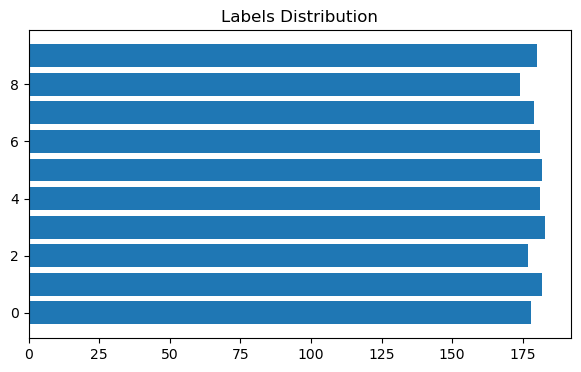

In [5]:
plt.title('Labels Distribution')
plt.barh(list(Counter(y).keys()), list(Counter(y).values()));


In [6]:
dict_result = {}


In [7]:
def visual_result(labels, title):
    plt.title('Distribution of Predicted clusters\n' + title)
    plt.barh(list(Counter(labels).keys()), list(Counter(labels).values()))
    plt.show()

    print(f"Rand Index: {metrics.rand_score(y, labels):.4f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.4f}")
    print(f"Adjusted Multual Information: {metrics.adjusted_mutual_info_score(y, labels):.4f}")
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.4f}")


In [ ]:
def visual_result_reduced(X_embedding, labels, title):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
    fig.suptitle(title, size=16)
    sp1 = axs[0].scatter(X_embedding[:, 0], X_embedding[:, 1], s=10, c=y, cmap='nipy_spectral', alpha=0.5)
    axs[0].set_title('Distribution of True labels')
    sp2 = axs[1].scatter(X_embedding[:, 0], X_embedding[:, 1], s=10, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[1].set_title('Distribution of Predicted labels')
    fig.colorbar(sp1)
    fig.colorbar(sp2)
    plt.show()

    print(f"Rand Index: {metrics.rand_score(y, labels):.4f}")
    print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(y, labels):.4f}")
    print(f"Adjusted Multual Information: {metrics.adjusted_mutual_info_score(y, labels):.4f}")
    print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.4f}")


# Clustering

## K-Means

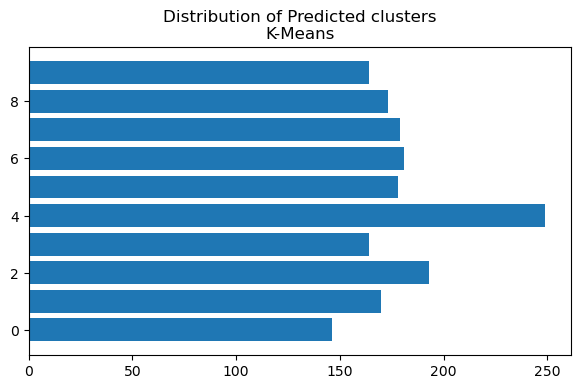

Rand Index: 0.9489
Adjusted Rand Index: 0.7173
Adjusted Multual Information: 0.7651
Silhouette Coefficient: 0.1758


In [8]:
model_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24)
model_kmeans.fit(X)
labels_kmeans = model_kmeans.labels_
visual_result(labels_kmeans, 'K-Means')
dict_result['kmeans'] = labels_kmeans


In [9]:
result_kmeans = pd.DataFrame({'clusters': labels_kmeans, 'labels': digits.target})
result_kmeans.sample(5)


,clusters,labels
1531,8,2
289,0,5
918,5,3
169,4,9
701,7,0


In [10]:
result_kmeans.loc[result_kmeans['clusters'] == 1, 'labels'].value_counts()


4    164
9      3
5      2
0      1
Name: labels, dtype: int64

In [11]:
result_kmeans.loc[(result_kmeans['clusters'] == 1) & (result_kmeans['labels'] == 0)]


,clusters,labels
1573,1,0


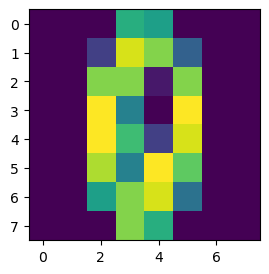

In [12]:
plt.figure(figsize=(3, 3))
plt.imshow(X[1573, :].reshape([8,8]));


## Agglomerative Clustering

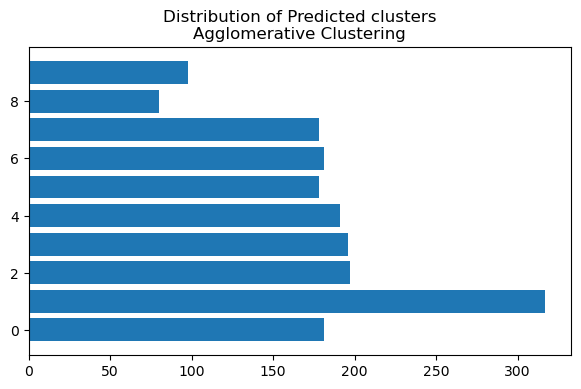

Rand Index: 0.9612
Adjusted Rand Index: 0.7940
Adjusted Multual Information: 0.8668
Silhouette Coefficient: 0.1785


In [13]:
model_agglom = AgglomerativeClustering(n_clusters=10)
model_agglom.fit(X)
labels_agglom = model_agglom.labels_
visual_result(labels_agglom, 'Agglomerative Clustering')
dict_result['agglom'] = labels_agglom


In [14]:
result_agglom = pd.DataFrame({'clusters': labels_agglom, 'labels': y})
result_agglom.sample(5)


,clusters,labels
1158,8,1
204,0,5
1628,3,4
643,4,8
1632,1,3


In [17]:
result_agglom.loc[result_agglom['clusters'] == 1, 'labels'].value_counts()


3    169
9    145
5      2
8      1
Name: labels, dtype: int64

In [16]:
result_agglom.loc[(result_agglom['clusters'] == 1) & (result_agglom['labels'] == 8)]


,clusters,labels
1149,1,8


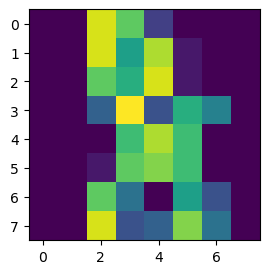

In [18]:
plt.figure(figsize=(3, 3))
plt.imshow(X[1149, :].reshape([8, 8]));


## DBSCAN

In [ ]:
X_scaler = StandardScaler().fit_transform(X)


Estimated number of clusters: 10
Estimated number of noise points: 346


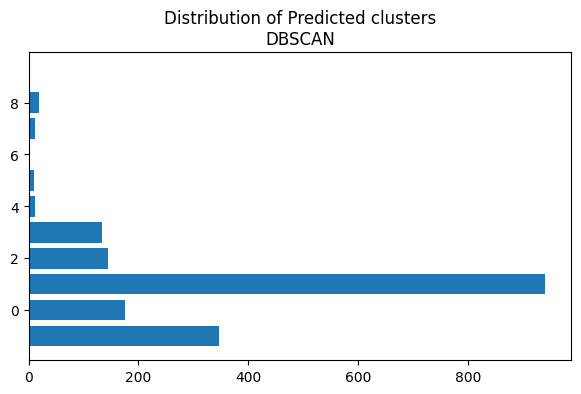

Rand Index: 0.7000
Adjusted Rand Index: 0.1804
Adjusted Multual Information: 0.4642
Silhouette Coefficient: -0.0418


In [ ]:
model_dbscan = DBSCAN(eps=4.609, min_samples=5).fit(X_scaler)
labels_dbscan = model_dbscan.labels_
print(f"Estimated number of clusters: {max(labels_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_dbscan).count(-1)}")
visual_result(labels_dbscan, 'DBSCAN')
dict_result['dbscan'] = labels_dbscan


In [ ]:
result_dbscan = pd.DataFrame({'clusters': labels_dbscan, 'labels': y})
result_dbscan.sample(5)


,clusters,labels
743,2,4
1721,9,2
777,1,1
648,1,2
62,1,3


In [ ]:
result_dbscan.loc[result_dbscan['clusters'] == 0, 'labels'].value_counts()


0    176
Name: labels, dtype: int64

In [ ]:
result_dbscan.loc[result_dbscan['clusters'] == 1, 'labels'].value_counts()


6    166
1    154
3    143
8    136
9    120
5    111
2    111
Name: labels, dtype: int64

In [ ]:
result_dbscan.loc[(result_dbscan['clusters'] == 1) & (result_dbscan['labels'] == 5)].sample(1)


,clusters,labels
1189,1,5


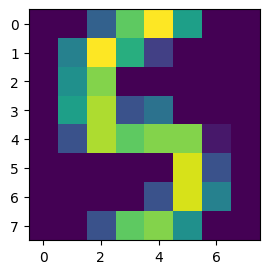

In [ ]:
plt.figure(figsize=(3 ,3))
plt.imshow(X[1162, :].reshape([8, 8]));


# Dimensionality Reduction

## PCA

In [ ]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


In [ ]:
X.shape, X_reduced.shape


((1797, 64), (1797, 2))

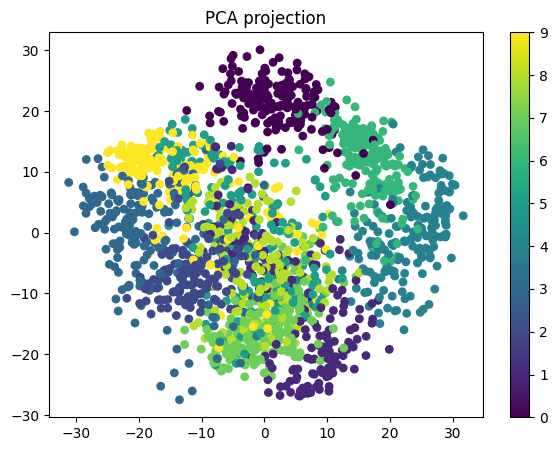

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y, edgecolors='none',
            alpha=1, s=40)
plt.colormaps.get_cmap('nipy_spectral')
plt.colorbar()
plt.title('PCA projection')
plt.show()


PCA doesn't seem to help much for clustering algorithms

### K-Means with PCA

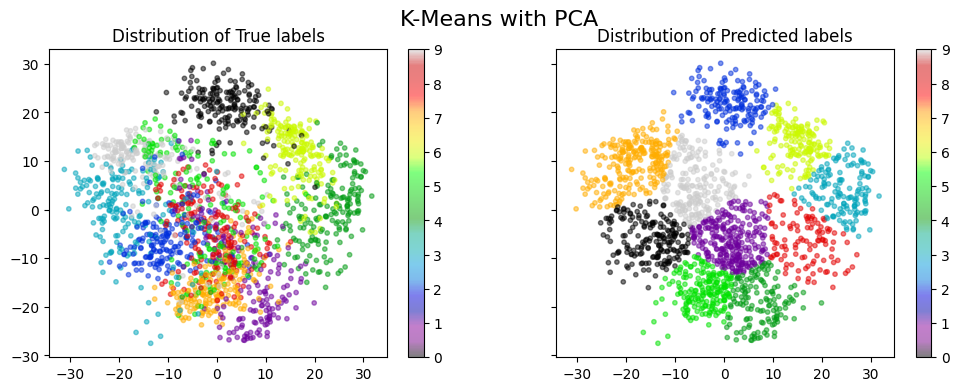

Rand Index: 0.8816
Adjusted Rand Index: 0.3567
Adjusted Multual Information: 0.5050
Silhouette Coefficient: 0.0846


In [ ]:
model_pca_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24).fit(X_reduced)
labels_pca_kmeans = model_pca_kmeans.labels_

visual_result_reduced(X_reduced, labels_pca_kmeans, 'K-Means with PCA')
dict_result['pca_kmeans'] = labels_pca_kmeans


### Agglomerative Clustering with PCA

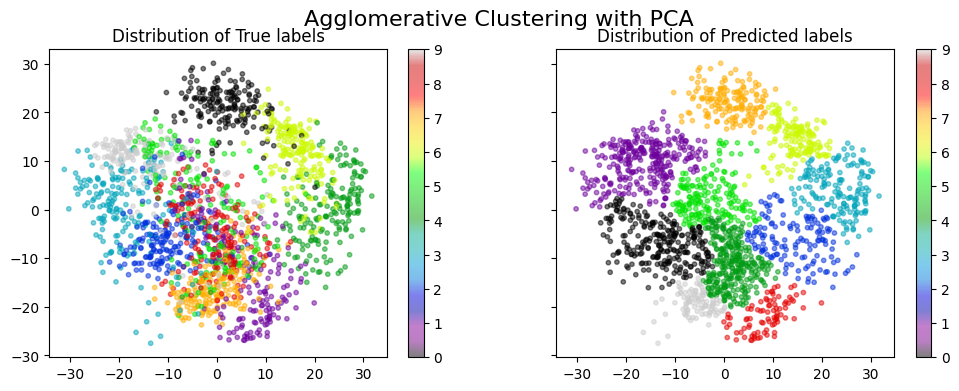

Rand Index: 0.8736
Adjusted Rand Index: 0.3428
Adjusted Multual Information: 0.4972
Silhouette Coefficient: 0.0748


In [ ]:
model_pca_agglom = AgglomerativeClustering(n_clusters=10).fit(X_reduced)
labels_pca_agglom = model_pca_agglom.labels_

visual_result_reduced(X_reduced, labels_pca_agglom, 'Agglomerative Clustering with PCA')
dict_result['pca_agglom'] = labels_pca_agglom


### DBSCAN with PCA

Estimated number of clusters: 10
Estimated number of noise points: 36


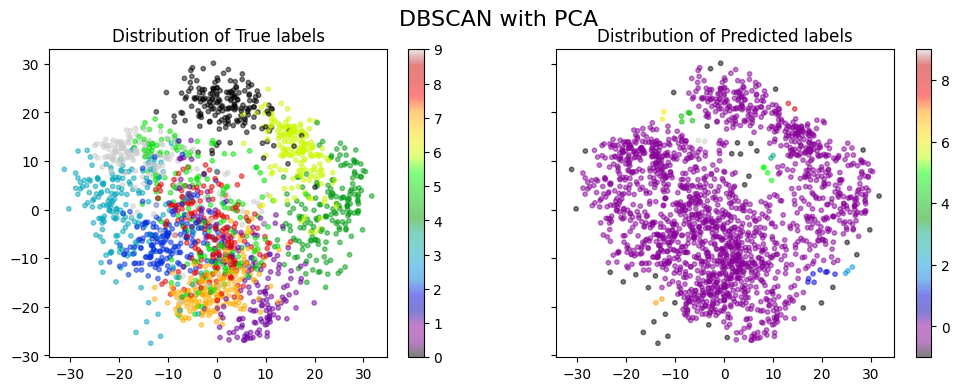

Rand Index: 0.1571
Adjusted Rand Index: 0.0001
Adjusted Multual Information: 0.0137
Silhouette Coefficient: -0.2166


In [ ]:
model_pca_dbscan = DBSCAN(eps=1.8, min_samples=2).fit(X_reduced)
labels_pca_dbscan = model_pca_dbscan.labels_
print(f"Estimated number of clusters: {max(labels_pca_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_pca_dbscan).count(-1)}")

visual_result_reduced(X_reduced, labels_pca_dbscan, 'DBSCAN with PCA')
dict_result['pca_dbscan'] = labels_pca_dbscan


## t-SNE

In [19]:
%%time
tsne = TSNE(random_state=24)
X_embeddings_tsne = tsne.fit_transform(X)


CPU times: total: 9.16 s
Wall time: 9.66 s


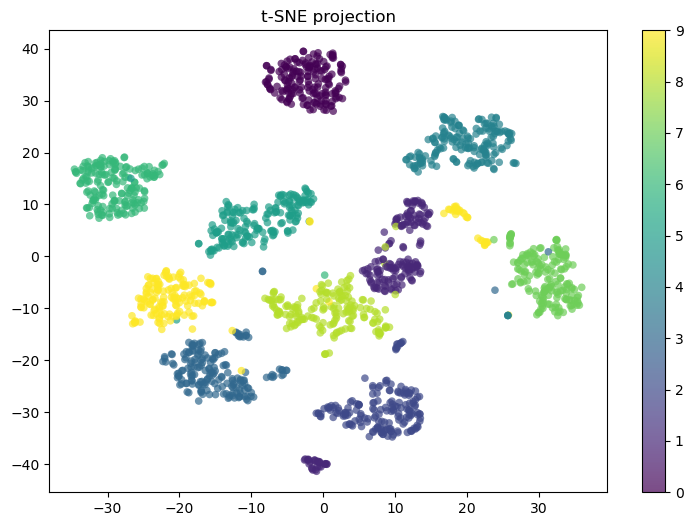

In [20]:
plt.figure(figsize=(9, 6))
plt.scatter(X_embeddings_tsne[:, 0], X_embeddings_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=30)
plt.colormaps.get_cmap('nipy_spectral')
plt.colorbar()
plt.title('t-SNE projection')
plt.show()


### K-Means with t-SNE

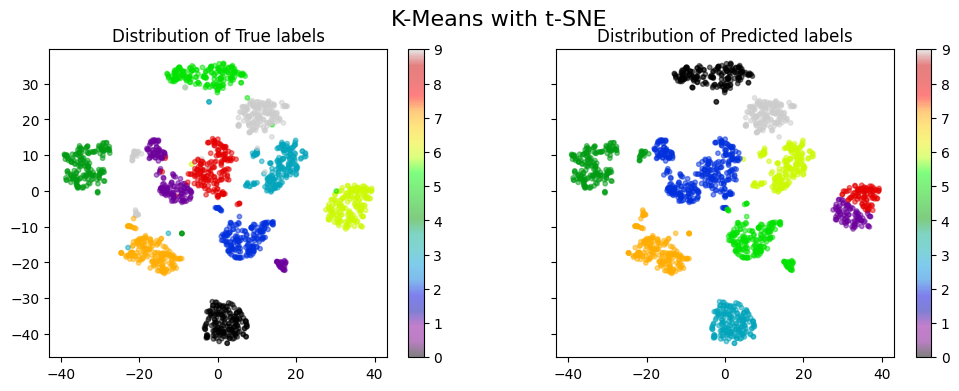

Rand Index: 0.9600
Adjusted Rand Index: 0.7891
Adjusted Multual Information: 0.8752
Silhouette Coefficient: 0.1402


In [ ]:
model_tsne_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24).fit(X_embeddings_tsne)
labels_tsne_kmeans = model_tsne_kmeans.labels_

visual_result_reduced(X_embeddings_tsne, labels_tsne_kmeans, 'K-Means with t-SNE')
dict_result['tsne_kmeans'] = labels_tsne_kmeans


### Agglomerative Clustering with t-SNE

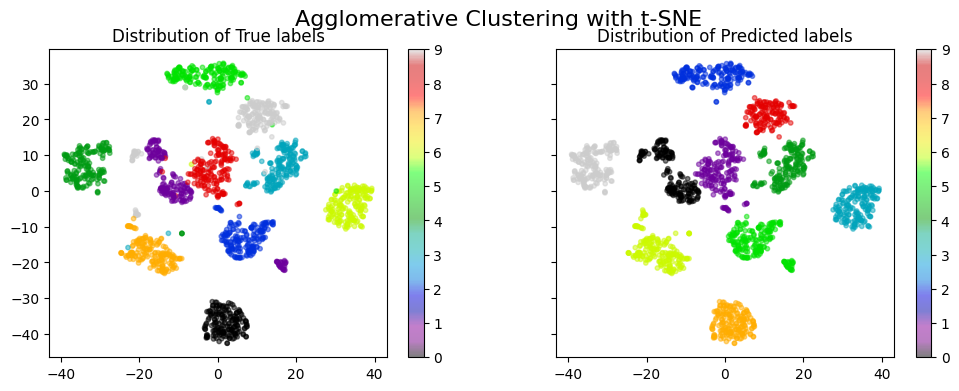

Rand Index: 0.9819
Adjusted Rand Index: 0.8991
Adjusted Multual Information: 0.9190
Silhouette Coefficient: 0.1642


In [ ]:
model_tsne_agglom = AgglomerativeClustering(n_clusters=10).fit(X_embeddings_tsne)
labels_tsne_agglom = model_tsne_agglom.labels_

visual_result_reduced(X_embeddings_tsne, labels_tsne_agglom, 'Agglomerative Clustering with t-SNE')
dict_result['tsne_agglom'] = labels_tsne_agglom


### DBSCAN with t-SNE

Estimated number of clusters: 10
Estimated number of noise points: 0


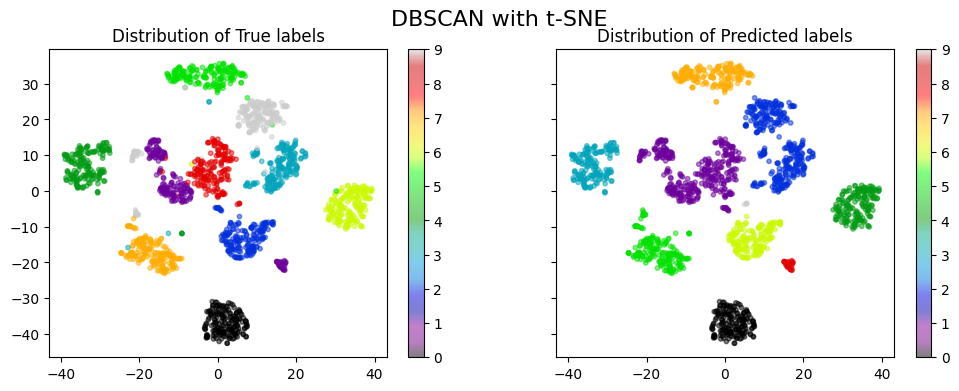

Rand Index: 0.9494
Adjusted Rand Index: 0.7544
Adjusted Multual Information: 0.8716
Silhouette Coefficient: 0.1468


In [ ]:
model_tsne_dbscan = DBSCAN(eps=3.42, min_samples=2).fit(X_embeddings_tsne)
labels_tsne_dbscan = model_tsne_dbscan.labels_

print(f"Estimated number of clusters: {max(labels_tsne_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_tsne_dbscan).count(-1)}")

visual_result_reduced(X_embeddings_tsne, labels_tsne_dbscan, 'DBSCAN with t-SNE')
dict_result['tsne_dbscan'] = labels_tsne_dbscan


## UMAP

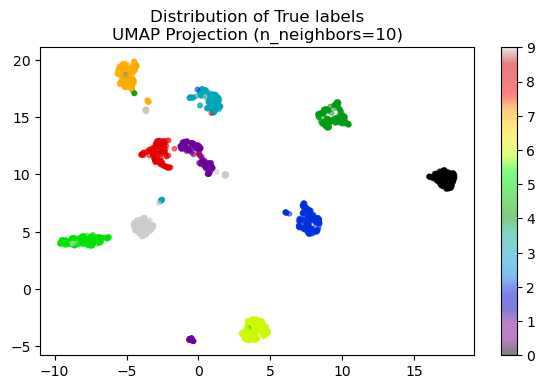

In [22]:
X_embedding_umap_10 = umap.UMAP(n_neighbors=10, n_jobs=1, random_state=24).fit_transform(X)

plt.scatter(X_embedding_umap_10[:, 0], X_embedding_umap_10[:, 1], s=10, c=y, cmap='nipy_spectral', alpha=0.5)
plt.title('Distribution of True labels\nUMAP Projection (n_neighbors=10)')
plt.colorbar()
plt.show()


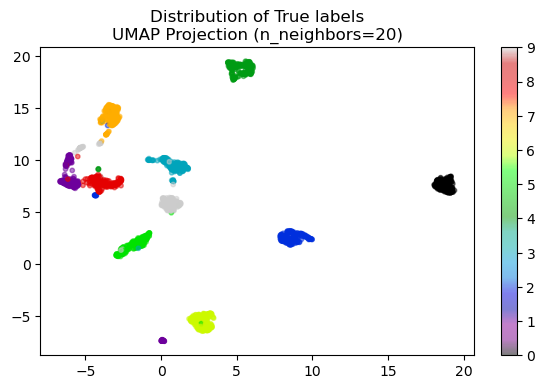

In [23]:
X_embedding_umap_20 = umap.UMAP(n_neighbors=20, n_jobs=1, random_state=24).fit_transform(X)

plt.scatter(X_embedding_umap_20[:, 0], X_embedding_umap_20[:, 1], s=10, c=y, cmap='nipy_spectral', alpha=0.5)
plt.title('Distribution of True labels\nUMAP Projection (n_neighbors=20)')
plt.colorbar()
plt.show()


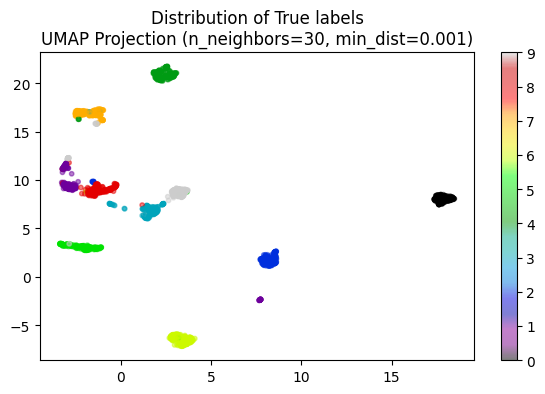

In [ ]:
X_embedding_umap = umap.UMAP(n_neighbors=30, min_dist=0.001, n_jobs=1, random_state=24).fit_transform(X)

plt.scatter(X_embedding_umap[:, 0], X_embedding_umap[:, 1], s=10, c=y, cmap='nipy_spectral', alpha=0.5)
plt.title('Distribution of True labels\nUMAP Projection (n_neighbors=30, min_dist=0.001)')
plt.colorbar()
plt.show()


### K-Means with UMAP

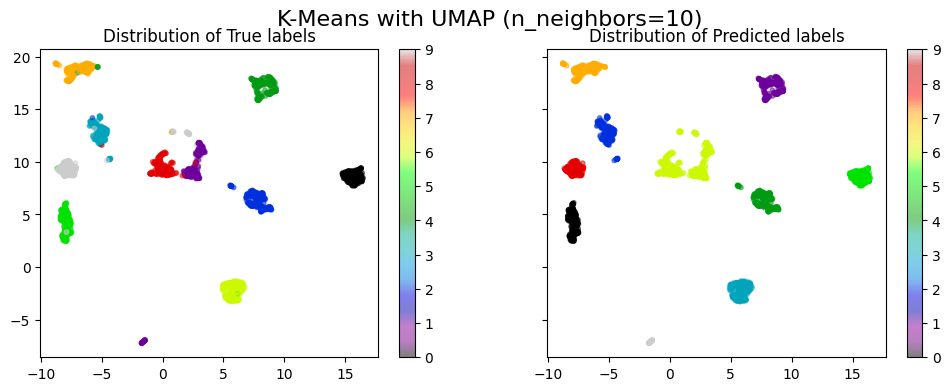

Rand Index: 0.9674
Adjusted Rand Index: 0.8316
Adjusted Multual Information: 0.9137
Silhouette Coefficient: 0.1582


In [ ]:
model_umap10_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24).fit(X_embedding_umap_10)
labels_umap10_kmeans = model_umap10_kmeans.labels_

visual_result_reduced(X_embedding_umap_10, labels_umap10_kmeans, 'K-Means with UMAP (n_neighbors=10)')
dict_result['umap10_kmeans'] = labels_umap10_kmeans


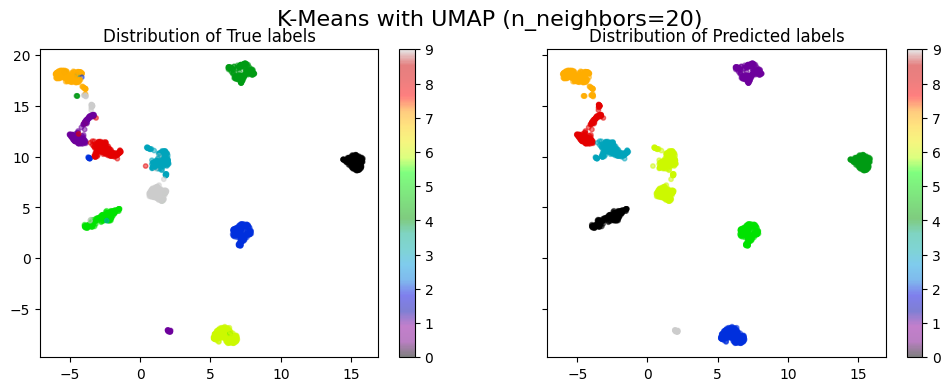

Rand Index: 0.9685
Adjusted Rand Index: 0.8348
Adjusted Multual Information: 0.9017
Silhouette Coefficient: 0.1727


In [ ]:
model_umap20_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24).fit(X_embedding_umap_20)
labels_umap20_kmeans = model_umap20_kmeans.labels_

visual_result_reduced(X_embedding_umap_20, labels_umap20_kmeans, 'K-Means with UMAP (n_neighbors=20)')
dict_result['umap20_kmeans'] = labels_umap20_kmeans


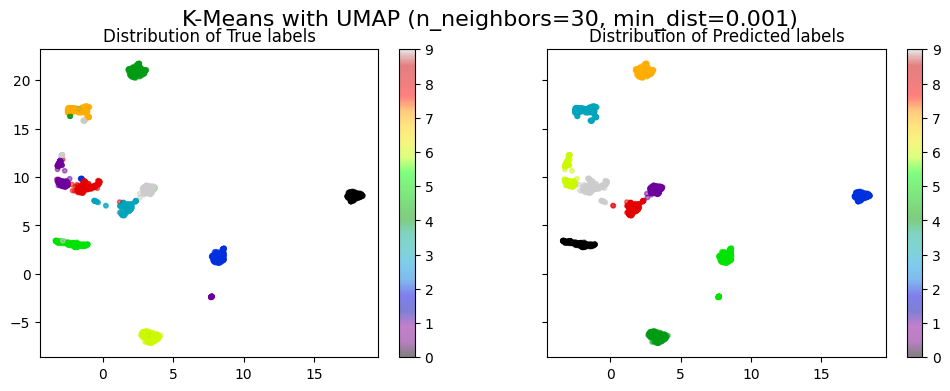

Rand Index: 0.9795
Adjusted Rand Index: 0.8859
Adjusted Multual Information: 0.9087
Silhouette Coefficient: 0.1643


In [ ]:
model_umap_kmeans = KMeans(n_clusters=10, n_init='auto', random_state=24).fit(X_embedding_umap)
labels_umap_kmeans = model_umap_kmeans.labels_

visual_result_reduced(X_embedding_umap, labels_umap_kmeans, 'K-Means with UMAP (n_neighbors=30, min_dist=0.001)')
dict_result['umap_kmeans'] = labels_umap_kmeans


### Agglomerative Clustering with UMAP

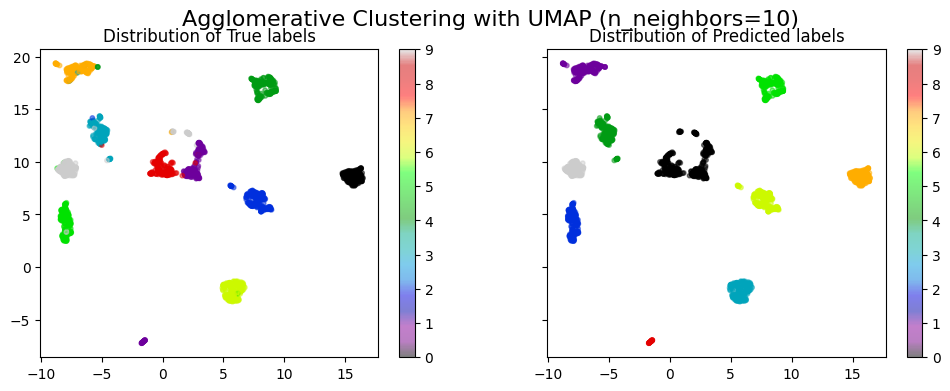

Rand Index: 0.9674
Adjusted Rand Index: 0.8316
Adjusted Multual Information: 0.9137
Silhouette Coefficient: 0.1582


In [ ]:
model_umap10_agglom = AgglomerativeClustering(n_clusters=10).fit(X_embedding_umap_10)
labels_umap10_agglom = model_umap10_agglom.labels_

visual_result_reduced(X_embedding_umap_10 , labels_umap10_agglom, 'Agglomerative Clustering with UMAP (n_neighbors=10)')
dict_result['umap10_agglom'] = labels_umap10_agglom


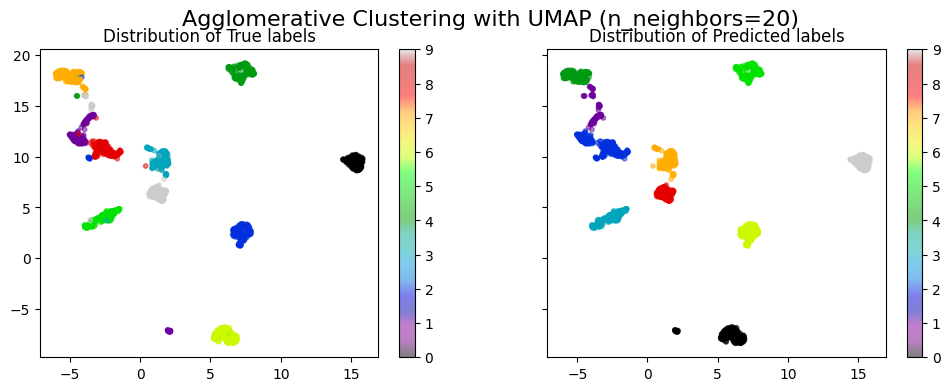

Rand Index: 0.9677
Adjusted Rand Index: 0.8243
Adjusted Multual Information: 0.8820
Silhouette Coefficient: 0.1677


In [ ]:
model_umap20_agglom = AgglomerativeClustering(n_clusters=10).fit(X_embedding_umap_20)
labels_umap20_agglom = model_umap20_agglom.labels_

visual_result_reduced(X_embedding_umap_20 , labels_umap20_agglom, 'Agglomerative Clustering with UMAP (n_neighbors=20)')
dict_result['umap20_agglom'] = labels_umap20_agglom


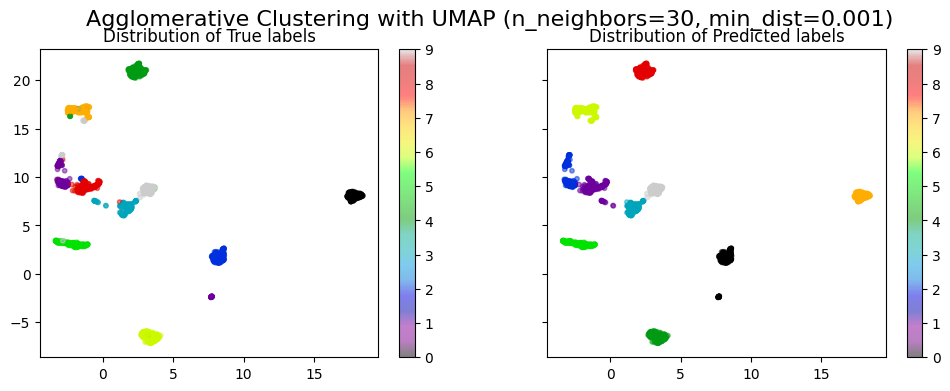

Rand Index: 0.9791
Adjusted Rand Index: 0.8836
Adjusted Multual Information: 0.9074
Silhouette Coefficient: 0.1644


In [ ]:
model_umap_agglom = AgglomerativeClustering(n_clusters=10).fit(X_embedding_umap)
labels_umap_agglom = model_umap_agglom.labels_

visual_result_reduced(X_embedding_umap, labels_umap_agglom, 'Agglomerative Clustering with UMAP (n_neighbors=30, min_dist=0.001)')
dict_result['umap_agglom'] = labels_umap_agglom


### DBSCAN with UMAP

Estimated number of clusters: 10
Estimated number of noise points: 0


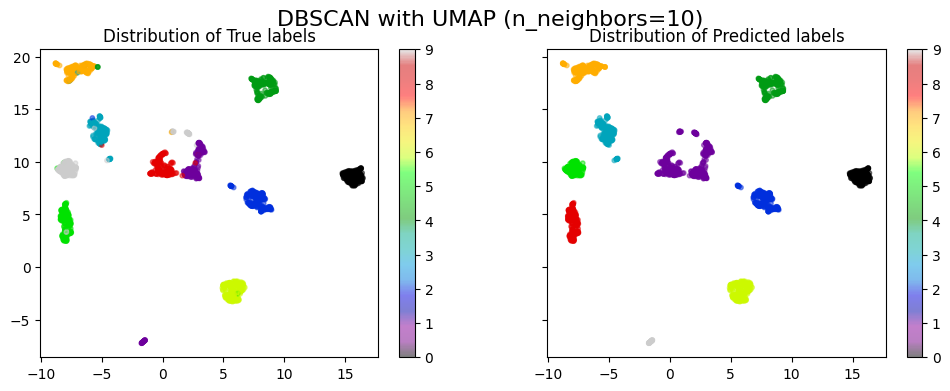

Rand Index: 0.9674
Adjusted Rand Index: 0.8316
Adjusted Multual Information: 0.9137
Silhouette Coefficient: 0.1582


In [ ]:
model_umap10_dbscan = DBSCAN(eps=2, min_samples=2).fit(X_embedding_umap_10)
labels_umap10_dbscan = model_umap10_dbscan.labels_

print(f"Estimated number of clusters: {max(labels_umap10_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_umap10_dbscan).count(-1)}")

visual_result_reduced(X_embedding_umap_10, labels_umap10_dbscan, 'DBSCAN with UMAP (n_neighbors=10)')
dict_result['umap10_dbscan'] = labels_umap10_dbscan


Estimated number of clusters: 10
Estimated number of noise points: 0


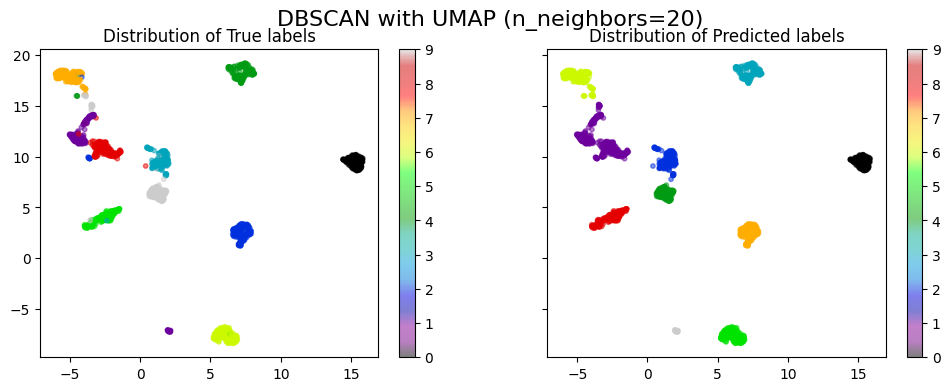

Rand Index: 0.9653
Adjusted Rand Index: 0.8207
Adjusted Multual Information: 0.9012
Silhouette Coefficient: 0.1603


In [ ]:
model_umap20_dbscan = DBSCAN(eps=0.5, min_samples=2).fit(X_embedding_umap_20)
labels_umap20_dbscan = model_umap20_dbscan.labels_

print(f"Estimated number of clusters: {max(labels_umap20_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_umap20_dbscan).count(-1)}")

visual_result_reduced(X_embedding_umap_20, labels_umap20_dbscan, 'DBSCAN with UMAP (n_neighbors=20)')
dict_result['umap20_dbscan'] = labels_umap20_dbscan


Estimated number of clusters: 10
Estimated number of noise points: 0


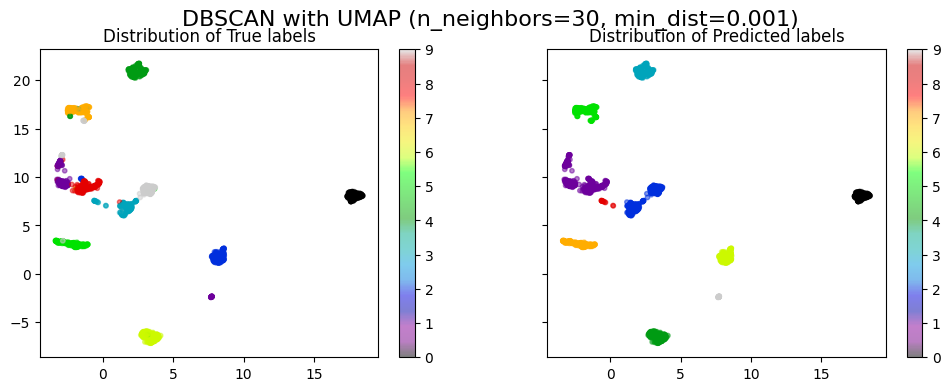

Rand Index: 0.9488
Adjusted Rand Index: 0.7501
Adjusted Multual Information: 0.8677
Silhouette Coefficient: 0.1500


In [ ]:
model_umap_dbscan = DBSCAN(eps=0.9, min_samples=2).fit(X_embedding_umap)
labels_umap_dbscan = model_umap_dbscan.labels_

print(f"Estimated number of clusters: {max(labels_umap_dbscan)+1}")
print(f"Estimated number of noise points: {list(labels_umap_dbscan).count(-1)}")

visual_result_reduced(X_embedding_umap, labels_umap_dbscan, 'DBSCAN with UMAP (n_neighbors=30, min_dist=0.001)')
dict_result['umap_dbscan'] = labels_umap_dbscan


In [ ]:
result_ = []
for model, label in dict_result.items():
    result_.append({
    'model': model,
    'Rand Index': metrics.rand_score(y, label),
    'Adjusted Rand Index': metrics.adjusted_rand_score(y, label),
    'Adjusted Multual Information':metrics.adjusted_mutual_info_score(y, label),
    'Silhouette Coefficient':metrics.silhouette_score(X, label)
    }
    )
result_df = pd.DataFrame(result_)
result_df.set_index('model')


,Rand Index,Adjusted Rand Index,Adjusted Multual Information,Silhouette Coefficient
model,,,,
kmeans,0.9489,0.7173,0.7651,0.1758
agglom,0.9612,0.7940,0.8668,0.1785
dbscan,0.7000,0.1804,0.4642,-0.0418
pca_kmeans,0.8816,0.3567,0.5050,0.0846
pca_agglom,0.8736,0.3428,0.4972,0.0748
pca_dbscan,0.1571,0.0001,0.0137,-0.2166
tsne_kmeans,0.9600,0.7891,0.8752,0.1402
tsne_agglom,0.9819,0.8991,0.9190,0.1642
tsne_dbscan,0.9494,0.7544,0.8716,0.1468
